In [62]:
import pandas as pd
pd.set_option('max_columns', None)
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.feature_selection import SelectFromModel
#finished pandas lessons 4 and 5
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
# Get train and test dataset
X_train = pd.read_csv(r'C:\Users\lukem\Desktop\Github AI Projects\Titanic\train.csv')
X_test = pd.read_csv(r'C:\Users\lukem\Desktop\Github AI Projects\Titanic\test.csv')
example_submission = pd.read_csv(r'C:\Users\lukem\Desktop\Github AI Projects\Titanic\gender_submission.csv')

In [64]:
X = X_train
X

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [70]:
y = X.sort_values(by='Fare')
y = y.reset_index()
y

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
1,597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
2,302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
3,633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
4,277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
887,341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
888,737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
889,258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C


In [68]:
y.sort_values(by='index').set_index('index')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
index,,,,,,,,,,,,
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


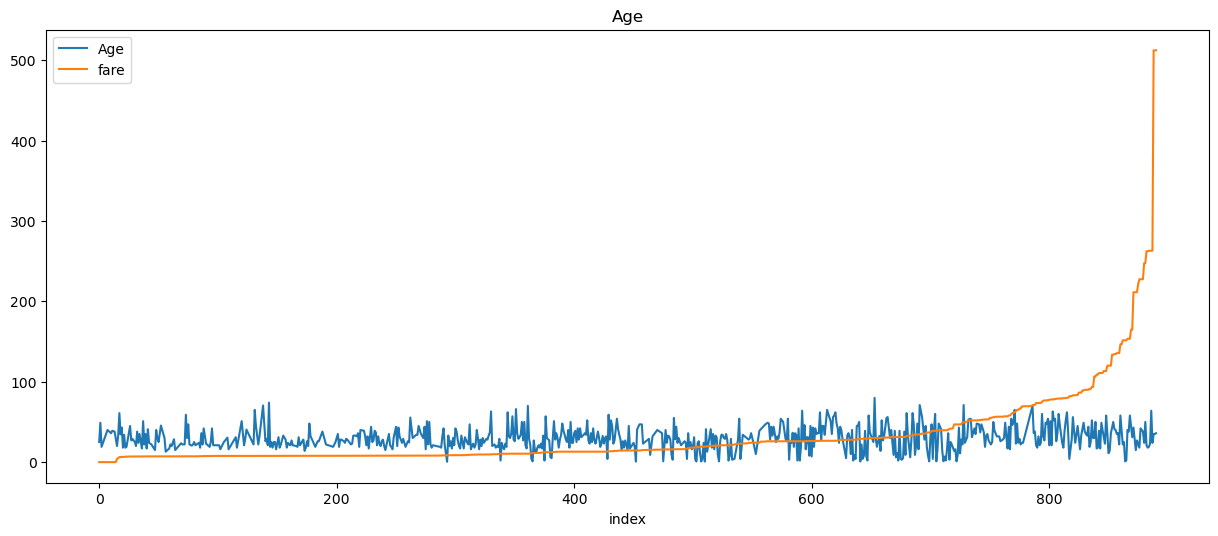

In [73]:
plt.figure(figsize=(15,6), dpi = 100, facecolor = 'pink', edgecolor = 'brown', frameon= False)
plt.title('Age')

sns.lineplot(data=y.Age,label = "Age")
sns.lineplot(data=y.Fare, label = "fare")
plt.xlabel('index')
plt.show()

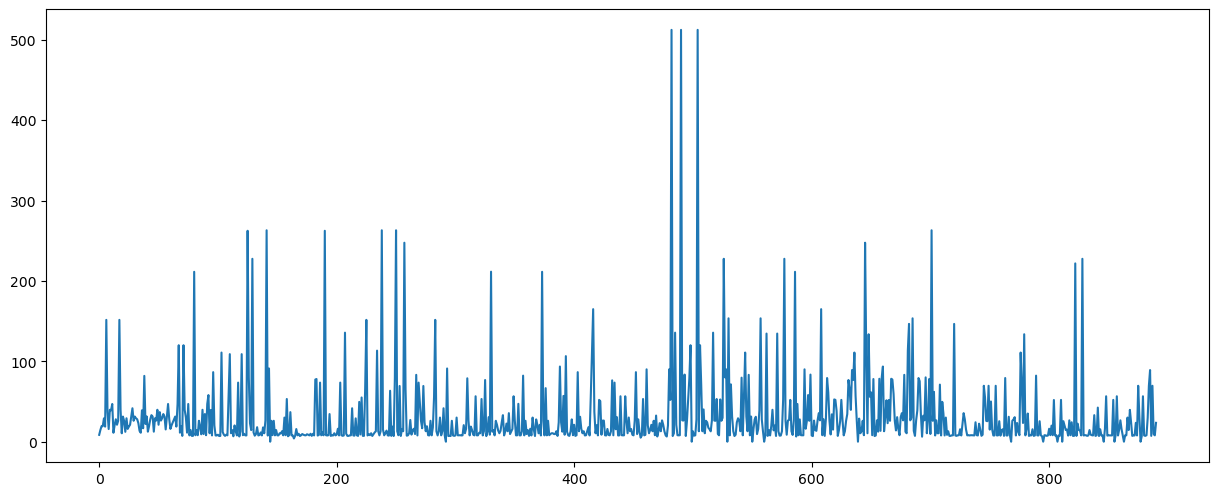

In [36]:
plt.figure(figsize=(15,6), dpi = 100, facecolor = 'pink', edgecolor = 'brown', frameon= False)
sns.lineplot(data=y.Fare)

In [9]:
X.groupby('Pclass').Age.agg(['min','max','mean'])

,min,max,mean
Pclass,,,
1,0.92,80.0,38.233441
2,0.67,70.0,29.877630
3,0.42,74.0,25.140620


In [62]:
X.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [68]:
X.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [67]:
X.Age = X.Age.fillna(20)
X.Cabin = X.Cabin.fillna('aaa')
X.Embarked = X.Embarked.fillna('S')

In [69]:
def round_df(row):
    row.Age = round(row.Age)
    row.Fare = round(row.Fare)
    return row

In [72]:
X = X.apply(round_df, axis = "columns")

In [74]:
X.Age = X.Age.astype('int64')

In [75]:
X.Fare = X.Fare.astype('int64')

In [76]:
X.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age             int64
SibSp           int64
Parch           int64
Ticket         object
Fare            int64
Cabin          object
Embarked       object
dtype: object

In [78]:
X.rename(columns = {'Age':'Years_alive'})

,PassengerId,Survived,Pclass,Name,Sex,Years_alive,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,aaa,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,8,aaa,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,aaa,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,aaa,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,20,1,2,W./C. 6607,23,aaa,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C


In [84]:
X.rename_axis("cool_stuff", axis = 'rows')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
cool_stuff,,,,,,,,,,,,
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,aaa,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,8,aaa,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,aaa,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,aaa,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,20,1,2,W./C. 6607,23,aaa,S


In [82]:
X.rename_axis("other_stuff",axis='columns')

other_stuff,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,aaa,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,8,aaa,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,aaa,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,aaa,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,20,1,2,W./C. 6607,23,aaa,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C


In [43]:
X.dtypes

PassengerId     object
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [38]:
X.PassengerId = X.PassengerId.astype('float64')

In [42]:
X.PassengerId = X.PassengerId.astype('object')

In [46]:
round(2.6)

3

In [49]:
X.Age = X.Age.fillna(90)

In [56]:
X.Age = X.Age.map(lambda p: round(p))

In [57]:
X.Age = X.Age.astype('int64')

In [58]:
X.dtypes

PassengerId     object
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [55]:
X.loc[X.Age.idxmax()]

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                          90
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object

In [12]:
X.groupby(['Pclass','Sex']).Fare.agg(['min','max','mean'])

min       max        mean
Pclass Sex                                  
1      female  25.9292  512.3292  106.125798
       male     0.0000  512.3292   67.226127
2      female  10.5000   65.0000   21.970121
       male     0.0000   73.5000   19.741782
3      female   6.7500   69.5500   16.118810
       male     0.0000   69.5500   12.661633

In [13]:
X.groupby(['Sex','Pclass']).Fare.agg(['min','max','mean'])

min       max        mean
Sex    Pclass                               
female 1       25.9292  512.3292  106.125798
       2       10.5000   65.0000   21.970121
       3        6.7500   69.5500   16.118810
male   1        0.0000  512.3292   67.226127
       2        0.0000   73.5000   19.741782
       3        0.0000   69.5500   12.661633

In [15]:
X.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
X[X.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [18]:
X.Age = X.Age.fillna("cow")

In [22]:
X.Age.replace('cow','hen')

0       22
1       38
2       26
3       35
4       35
      ... 
886     27
887     19
888    hen
889     26
890     32
Name: Age, Length: 891, dtype: object

In [25]:
X.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
X['Cabin'] = X.Cabin.fillna('brown')

In [30]:
X['Cabin'].astype('int64')

ValueError: invalid literal for int() with base 10: 'brown'

In [7]:
X_Age_mean = X.Age.mean()

In [26]:
X.groupby('Sex')['Fare'].count()

Sex
female    314
male      577
Name: Fare, dtype: int64

In [30]:
X.Pclass.sort_values().tail(20)

388    3
384    3
359    3
360    3
362    3
363    3
364    3
365    3
367    3
386    3
368    3
372    3
374    3
376    3
378    3
379    3
381    3
382    3
371    3
890    3
Name: Pclass, dtype: int64

In [38]:
y = X.sort_values(by = 'Age', ascending = False)

In [39]:
y

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [40]:
y.sort_index()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
type(X.groupby('Embarked').size())

pandas.core.series.Series

In [41]:
X.loc[X.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [42]:
X[X.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [45]:
y = X.Age.fillna(52)

In [53]:
blue = X.head(5)
blue

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
red = X.loc[5:10]
red

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [59]:
pd.concat([blue, red])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [55]:
#https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}
df_a = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_a.subject_id = df_a.subject_id.astype('int64')
df_a


,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [38]:
df_b.dtypes

subject_id_int     int64
first_name        object
last_name         object
dtype: object

In [56]:
raw_data = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_b.subject_id = df_b.subject_id.astype('int64')
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [57]:
df_a.merge(df_b, how='outer',on='subject_id')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


In [61]:
x = df_b.rename(columns={'subject_id':'the_subject_id'})
x
sdf

,the_subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [6]:
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}
df_n = pd.DataFrame(raw_data, columns = ['subject_id','test_id'])
df_n

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [99]:
g = pd.concat([df_a, df_b])
g
#g.reset_index().drop('index', axis = 1).rename(columns = {'subject_id':'id_number'})

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [101]:
g.reset_index(drop = True)

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
5,4,Billy,Bonder
6,5,Brian,Black
7,6,Bran,Balwner
8,7,Bryce,Brice
9,8,Betty,Btisan


In [104]:
y = range(0, 5, 1)
for n in y:
    print(n)

0
1
2
3
4


In [106]:
y

range(0, 5)

In [97]:
df_a.merge(df_b, on ='subject_id', how = "right")

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black
2,6,NaN,NaN,Bran,Balwner
3,7,NaN,NaN,Bryce,Brice
4,8,NaN,NaN,Betty,Btisan


In [72]:
df_a.merge(df_b, on = 'subject_id', how = 'outer')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


In [78]:
df_a.join(df_b, on = 'subject_id')
#https://stackoverflow.com/questions/22676081/what-is-the-difference-between-join-and-merge-in-pandas

AttributeError: module 'pandas' has no attribute 'join'

In [75]:
df_a.dtypes

subject_id    object
first_name    object
last_name     object
dtype: object

In [77]:
df_b.dtypes

subject_id    object
first_name    object
last_name     object
dtype: object

In [69]:
df_a.merge(df_b, on = 'subject_id')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


In [17]:
X.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
X.groupby(['Sex','Fare']).idxmax()

PassengerId  Survived  Pclass    Age  SibSp  Parch
Sex    Fare                                                        
female 6.7500            654       654     654  654.0    654    654
       7.2250            875        19      19  875.0     19     19
       7.2292            780       367     367  780.0    367    367
       7.2500            376       376     376  376.0    376    376
       7.4958            786       786     786  786.0    786    786
...                      ...       ...     ...    ...    ...    ...
male   221.7792          527       527     527    NaN    527    527
       227.5250          557       557     557    NaN    557    557
       247.5208          118       118     118  118.0    118    118
       263.0000          438        27      27  438.0     27    438
       512.3292          737       679     679  679.0    679    679

[349 rows x 6 columns]

In [16]:
X.groupby('Pclass').Fare.max()

Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

In [17]:
X.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [20]:
X.loc[X.Fare.idxmax()]

PassengerId                 259
Survived                      1
Pclass                        1
Name           Ward, Miss. Anna
Sex                      female
Age                          35
SibSp                         0
Parch                         0
Ticket                 PC 17755
Fare                    512.329
Cabin                       NaN
Embarked                      C
Name: 258, dtype: object

In [24]:
X.loc[X.Age.idxmin()]

PassengerId                                804
Survived                                     1
Pclass                                       3
Name           Thomas, Master. Assad Alexander
Sex                                       male
Age                                       0.42
SibSp                                        0
Parch                                        1
Ticket                                    2625
Fare                                    8.5167
Cabin                                      NaN
Embarked                                     C
Name: 803, dtype: object

In [27]:
X.Age.max()

80.0

In [8]:
def manipulate_points(row):
    row.Age = row.Age - X_Age_mean
    row.Survived = row.Survived - 10
    row.Sex = "ur mom"
    return row

In [9]:
xy = X.apply(manipulate_points, axis = "columns")

In [13]:
thisthing = X.Sex + " rocks " + X.Name
thisthing

0                     male rocks Braund, Mr. Owen Harris
1      female rocks Cumings, Mrs. John Bradley (Flore...
2                    female rocks Heikkinen, Miss. Laina
3      female rocks Futrelle, Mrs. Jacques Heath (Lil...
4                    male rocks Allen, Mr. William Henry
                             ...                        
886                     male rocks Montvila, Rev. Juozas
887            female rocks Graham, Miss. Margaret Edith
888    female rocks Johnston, Miss. Catherine Helen "...
889                     male rocks Behr, Mr. Karl Howell
890                       male rocks Dooley, Mr. Patrick
Length: 891, dtype: object

In [16]:
X

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
X.groupby('Pclass').Fare.min()

Pclass
1    0.0
2    0.0
3    0.0
Name: Fare, dtype: float64

In [41]:
X.loc[X.Fare==0].Survived.value_counts()

0    14
1     1
Name: Survived, dtype: int64

In [8]:
X.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [10]:
X.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [4]:
X_Age_mean = X.Age.mean()
X_Age_mean

29.69911764705882

In [6]:
X.Age = X.Age.map(lambda p: p - X_Age_mean+500)
X

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,462.601765,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,478.601765,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,466.601765,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,475.601765,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,475.601765,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,467.601765,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,459.601765,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,466.601765,0,0,111369,30.0000,C148,C


In [11]:
def remean_points(df):
    df.Age = df.Age - X_Age_mean
    df.Fare = df.Fare - 500
    df.Survived = df.Pclass
    return df

In [14]:
X2 = X.apply(remean_points, axis = 1)

In [15]:
X2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,3,"Braund, Mr. Owen Harris",male,432.902647,1,0,A/5 21171,-492.7500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,448.902647,1,0,PC 17599,-428.7167,C85,C
2,3,3,3,"Heikkinen, Miss. Laina",female,436.902647,0,0,STON/O2. 3101282,-492.0750,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,445.902647,1,0,113803,-446.9000,C123,S
4,5,3,3,"Allen, Mr. William Henry",male,445.902647,0,0,373450,-491.9500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,2,"Montvila, Rev. Juozas",male,437.902647,0,0,211536,-487.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,429.902647,0,0,112053,-470.0000,B42,S
888,889,3,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,-476.5500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,436.902647,0,0,111369,-470.0000,C148,C


In [16]:
pd.Series(["cow",'dog'], index = [1, 2])

1    cow
2    dog
dtype: object

In [33]:
np.count_nonzero(X['Cabin'].value_counts()>3)

3

In [34]:
Age_mean = X.Age.mean()

In [70]:
def reAge_people(df):
    df.Age = df.Age - Age_mean -1000
    df.Fare = df.Fare - 50
    df.Embarked = 50
    df.Sex = "unknown_69"
    return df

In [72]:
X.Age

0      462.601765
1      478.601765
2      466.601765
3      475.601765
4      475.601765
          ...    
886    467.601765
887    459.601765
888           NaN
889    466.601765
890    472.601765
Name: Age, Length: 891, dtype: float64

In [80]:
X[X.Age > 470]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,478.601765,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,475.601765,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,475.601765,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,494.601765,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,498.601765,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,487.601765,0,0,345765,9.0000,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,496.601765,0,1,11767,83.1583,C50,C
881,882,0,3,"Markun, Mr. Johann",male,473.601765,0,0,349257,7.8958,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,479.601765,0,5,382652,29.1250,NaN,Q


In [35]:
X.loc[X.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [ ]:
def remean_points(row):
    row.points = row.points - review_points_mean
    return row

reviews.apply(remean_points, axis='columns')

In [8]:
X.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [28]:
X['Fare'] = X.Fare.map(lambda p: p - X_mean)

In [31]:
X_age_mean = X.Age.mean()
X_age_mean

29.69911764705882

In [36]:
X.Age = X.Age.map(lambda p: p + X_age_mean)

In [44]:
X_age_series = X.Age

In [40]:
X.Age = X.Age.map(X.Age + X_age_series)

In [45]:
X_age_series

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [46]:
X

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [49]:
X.Age = X.Age + 10

In [57]:
X.Age = X.Age.map(lambda p: (p + 10)*cow)

In [60]:
X_fare_mean = X.Fare.mean()
X_fare_mean

32.2042079685746

In [61]:
X.Fare = X.Fare.map(lambda p: p - X_fare_mean)

In [62]:
X

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,300.0,1,0,A/5 21171,-24.954208,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,300.0,1,0,PC 17599,39.079092,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,300.0,0,0,STON/O2. 3101282,-24.279208,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,300.0,1,0,113803,20.895792,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,300.0,0,0,373450,-24.154208,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,300.0,0,0,211536,-19.204208,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,300.0,0,0,112053,-2.204208,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,-8.754208,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,300.0,0,0,111369,-2.204208,C148,C


In [17]:
male_survived = X_train.loc[(X_train.Sex == "male") & (X_train.Survived == 1)]

In [40]:
X_train.iloc[(X_train.Sex == "female").values, 2]

1      1
2      3
3      1
8      3
9      2
      ..
880    2
882    3
885    3
887    1
888    3
Name: Pclass, Length: 314, dtype: int64

In [41]:
X_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [43]:
age_mean = X_train.Age.mean()

In [46]:
age_mean

29.69911764705882

In [44]:
X_train.Age = X_train.Age - age_mean

In [45]:
X_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,-7.699118,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,8.300882,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,-3.699118,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.300882,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,5.300882,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,-2.699118,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,-10.699118,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,-3.699118,0,0,111369,30.0000,C148,C


In [27]:
female_shit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [21]:
male_survived.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,109.000000,109.0,109.000000,93.000000,109.000000,109.000000,109.000000
mean,475.724771,1.0,2.018349,27.276022,0.385321,0.357798,40.821484
std,244.717482,0.0,0.922774,16.504803,0.636952,0.645826,71.355967
min,18.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,272.000000,1.0,1.000000,18.000000,0.000000,0.000000,9.500000
50%,508.000000,1.0,2.000000,28.000000,0.000000,0.000000,26.287500
75%,680.000000,1.0,3.000000,36.000000,1.000000,1.000000,39.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,2.000000,512.329200


In [4]:
X_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
X_train['Survived'] = 2

In [61]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,2,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,2,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,2,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
X_train.NewAge = 'howdy'

AttributeError: 'str' object has no attribute 'NewAge'

In [56]:
type(X_train)

str

In [28]:
X_train.loc[(X_train.Age < 20) &  (X_train.Survived == 0)].shape[0]

85

In [29]:
X_train.loc[(X_train.Age < 20) &  (X_train.Survived == 1)].shape[0]

79

In [23]:
X_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
X_train.loc[(X_train.Survived == 0)].shape[0]

549

In [33]:
X_train.loc[(X_train.Survived == 1)].shape[0]

342

In [38]:
X_train.loc[X_train.Fare > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [45]:
X_train.loc[X_train.Embarked == "C"]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C


In [44]:
X_train = X_train.set_index('PassengerId')